# Split Operator Implementation

In [1]:
# Usual imports
import matplotlib.pyplot as plt               # for plotting
import numpy as np                            # matrix handling

from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt
from matplotlib import animation, rc

In [2]:
# CONSTANTS
L  = 50
Nx = 10000
Nt = 1000
T  = [5,20,50] # only changing parameter

In [3]:
folders = []
for t in T:
    folders.append('./heavy/L'+str(L)+'-Nx'+str(Nx)+'-Nt'+str(Nt)+'-T'+str(t))

In [4]:
folders

['./heavy/L50-Nx10000-Nt1000-T5',
 './heavy/L50-Nx10000-Nt1000-T20',
 './heavy/L50-Nx10000-Nt1000-T50']

In [5]:
waves_real = np.array([])
waves_imag = np.array([])

for folder in folders:
    if folder == folders[0]:
        waves_real = np.genfromtxt(folder +'/real_wavefunc.csv', delimiter='')
        waves_imag = np.genfromtxt(folder +'/imag_wavefunc.csv', delimiter='')
    else:
        waves_real = np.dstack((waves_real, np.genfromtxt(folder +'/real_wavefunc.csv', delimiter='')))
        waves_imag = np.dstack((waves_imag, np.genfromtxt(folder +'/imag_wavefunc.csv', delimiter='')))

In [6]:
np.shape(waves_real)
# t  ,  x   , T

(1001, 10001, 3)

In [7]:
# function takes frame as an input
def AnimationProb(t):
    # setting y according to frame
    # number and + x. It's logic
    y  = ( np.square(waves_real[t,:,1]) + np.square(waves_imag[t,:,1]) )
    
    # line is set with new values of x and y
    line_plotted.set_data((x, y))
    line_plotted.set_color('green')

def AnimationReal(t):
    # setting y according to frame
    # number and + x. It's logic
    re = waves_real[t,:,1]
    
    # line is set with new values of x and y
    line_plotted.set_data((x, re))
    line_plotted.set_color('b')
    
    
# function takes frame as an input
def AnimationImag(t):
    # setting y according to frame
    # number and + x. It's logic
    im = waves_imag[t,:,1]
    
    # line is set with new values of x and y
    line_plotted.set_data((x, im))
    line_plotted.set_color('r')

In [8]:
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt

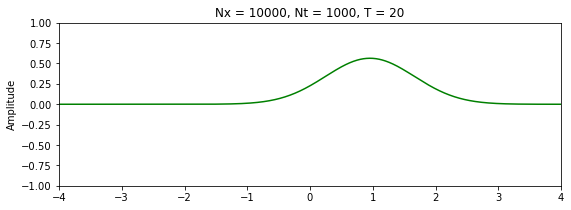

In [9]:
Figure = plt.figure(figsize=(9,3))
 
# creating a plot
lines_plotted = plt.plot([])   
line_plotted = lines_plotted[0]
 
plt.xlim(-4,4) 
plt.ylim(-1,1)   
plt.ylabel('Amplitude')
plt.title('Nx = 10000, Nt = 1000, T = 20')
# initialising x from 0 to 2∏
x = np.linspace(-L, L, num=Nx+1 )

anim_prob = FuncAnimation(Figure, AnimationProb, frames=Nt)

f = '../imgs/wave_prob.gif'
writergif = animation.PillowWriter(fps=180) 
anim_prob.save(f, writer=writergif,dpi=128)

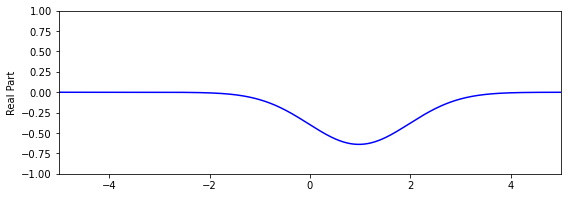

In [10]:
Figure = plt.figure(figsize=(9,3))
 
# creating a plot
lines_plotted = plt.plot([])   
line_plotted = lines_plotted[0]
 
plt.xlim(-5,5) 
plt.ylim(-1,1)     
plt.ylabel('Real Part')
# initialising x from 0 to 2∏
x = np.linspace(-L, L, num=Nx+1 )

anim_real = FuncAnimation(Figure, AnimationReal, frames=Nt)

f = '../imgs/wave_real.gif'
writergif = animation.PillowWriter(fps=180) 
anim_real.save(f, writer=writergif,dpi=128)

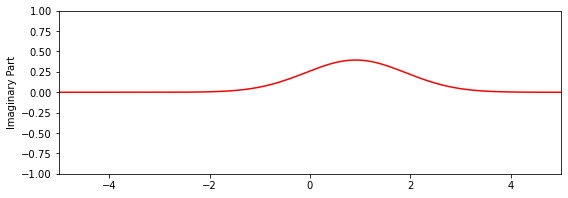

In [11]:
Figure = plt.figure(figsize=(9,3))
 
# creating a plot
lines_plotted = plt.plot([])   
line_plotted = lines_plotted[0]
 
plt.xlim(-5,5) 
plt.ylim(-1,1)      
plt.ylabel('Imaginary Part')
# initialising x from 0 to 2∏
x = np.linspace(-L, L, num=Nx+1 )

anim_im = FuncAnimation(Figure, AnimationImag, frames=Nt)

f = '../imgs/wave_im.gif'
writergif = animation.PillowWriter(fps=180) 
anim_im.save(f, writer=writergif,dpi=128)

In [12]:
import scipy.stats

In [13]:
def E_wave(T):
    E = []
    xspace = np.linspace(-L, L, num=Nx+1 )
    step = xspace[1] - xspace[0]
    for t in range(Nt):
        wave = ( np.square(waves_real[t,:,T]) + np.square(waves_imag[t,:,T]) )
        tmp = 0
        for x in range(len(wave)):
            tmp = tmp + wave[x]*xspace[x]*step
            
        E.append(tmp)
    return E

def E_wave2(T):
    var = []
    E = []
    for t in range(Nt):
        E.append(np.var(np.square(waves_real[t,:,T]) + np.square(waves_imag[t,:,T])))
        
    return np.sqrt(E)

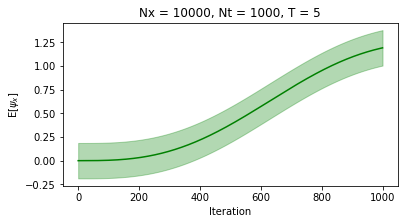

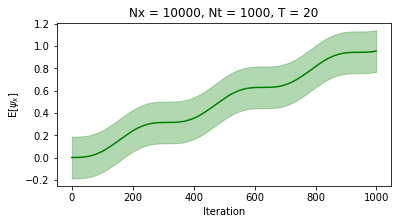

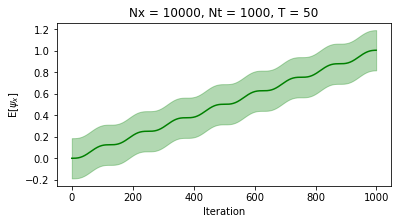

In [14]:
for i in range(len(T)):
    plt.figure(figsize=(6,3))
    plt.title('Nx = 10000, Nt = 1000, T = '+str(T[i]))
    plt.ylabel(r'E[$\psi_x$]')
    plt.xlabel('Iteration')
    Ewave = E_wave(i)
    varwave = E_wave2(i)
    plt.plot(Ewave,color='green')
    plt.fill_between(np.arange(len(Ewave)),Ewave+3*varwave, Ewave-3*varwave,color='green',alpha=0.3)

    plt.savefig('../imgs/ET'+str(T[i])+'.svg', format='svg')

In [15]:
xspace = np.linspace(-L, L, num=Nx+1 )
xstep = xspace[1] - xspace[0]
Lp = np.pi/xstep

In [16]:
p_waves_real = np.array([])
p_waves_imag = np.array([])

for folder in folders:
    if folder == folders[0]:
        p_waves_real = np.genfromtxt(folder +'/real_p_wavefunc.csv', delimiter='')
        p_waves_imag = np.genfromtxt(folder +'/imag_p_wavefunc.csv', delimiter='')
    else:
        p_waves_real = np.dstack((p_waves_real, np.genfromtxt(folder +'/real_p_wavefunc.csv', delimiter='')))
        p_waves_imag = np.dstack((p_waves_imag, np.genfromtxt(folder +'/imag_p_wavefunc.csv', delimiter='')))

In [17]:
def Ep_wave(T):
    E = []
    xspace = np.linspace(-Lp, Lp, num=Nx+1 )
    step = xspace[1] - xspace[0]
    for t in range(Nt):
        wave = ( np.square(p_waves_real[t,:,T]) + np.square(p_waves_imag[t,:,T]) )
        tmp = 0
        for x in range(len(wave)):
            tmp = tmp + wave[x]*xspace[x]*step
            
        E.append(tmp)
    return E

def Ep_wave2(T):
    var = []
    E = []
    for t in range(Nt):
        E.append(np.var(np.square(p_waves_real[t,:,T]) + np.square(p_waves_imag[t,:,T])))
        
    return np.sqrt(E)

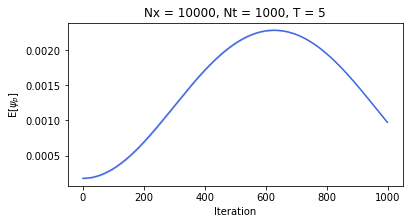

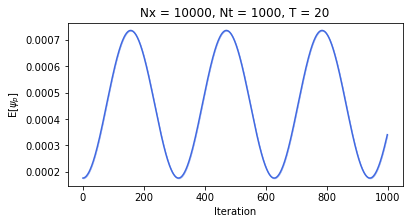

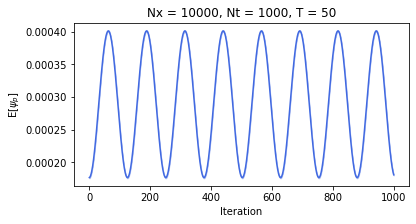

In [18]:
for i in range(len(T)):
    plt.figure(figsize=(6,3))
    plt.title('Nx = 10000, Nt = 1000, T = '+str(T[i]))
    plt.ylabel(r'E[$\psi_p$]')
    plt.xlabel('Iteration')
    Ewave = Ep_wave(i)
    Ewave = np.asarray(Ewave)
    Ewave = -Ewave
    varwave = Ep_wave2(i)
    plt.plot(Ewave,color='royalblue')
    plt.fill_between(np.arange(len(Ewave)),Ewave+3*varwave, Ewave-3*varwave,color='royalblue',alpha=0.3)

    plt.savefig('../imgs/PET'+str(T[i])+'.svg', format='svg')